# Notebook for visualizaition of inferred lineage network

In [1]:
library(tidyverse)
library(igraph)
library(ggraph)
library(graphlayouts)
library(ggforce)
library(scatterpie)
library(ggnetwork)

library(RColorBrewer)
library(ggplot2)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [3]:
links = read.table('links_louvain_for_lineage_manual.tsv')
frac = read.table('frac_lower_resolution.tsv', header = T, row.names=1)

In [4]:
sizes = read.table('louvain_clust_size.tsv', row.names=1, header = F, sep = '\t')

In [5]:
cc = read.table('cc_louvain_freq.tsv', header = T, row.names=1)

## Phenograph clusters over the lineage graph

In [14]:
# Create a graph object 
g <- graph_from_data_frame( links )

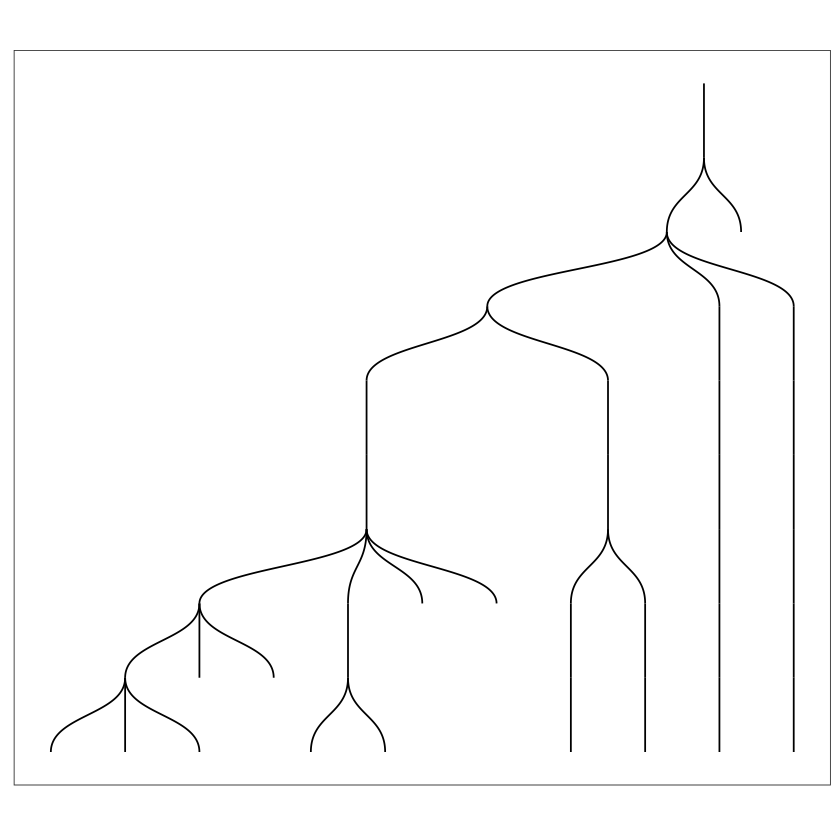

In [15]:
ggraph(g,'tree', circular = F) + 
  geom_edge_diagonal() +
  scale_edge_alpha('Direction', guide = 'edge_direction') +
  #geom_scatterpie(data=frac, cols=c("P_0", "P_1"), colour = NA ,pie_scale = 2) + 
  coord_equal() +
  theme_void() +
  ggforce::theme_no_axes()

In [16]:
color = c('P_00'='#56b567',
 'P_01'='#bce4b5',
 'P_02'='#8ed08b',
 'P_03'='#bc141a',
 'P_04'='#c6c6c6',
 'P_05'='#e1f3dc',
 'P_06'='#f14432',
 'P_07'='#959595',
 'P_08'='#fece65',
 'P_09'='#c6dbef',
 'P_10'='#6aaed6',
 'P_11'='#8d89c0',
 'P_12'='#fc8a6a',
 'P_13'='#2070b4',
 'P_14'='#fdcab5')

In [18]:
labels = as.character(sizes[names(V(g)),])

In [19]:
set.seed(1439)


frac <- frac[names(V(g)),]
g <- graph_from_data_frame( links )


V(g)$P_00 <- frac$P_0
V(g)$P_01 <- frac$P_1
V(g)$P_02 <- frac$P_2
V(g)$P_03 <- frac$P_3
V(g)$P_04 <- frac$P_4
V(g)$P_05 <- frac$P_5
V(g)$P_06 <- frac$P_6
V(g)$P_07 <- frac$P_7
V(g)$P_08 <- frac$P_8
V(g)$P_09 <- frac$P_9
V(g)$P_10 <- frac$P_10
V(g)$P_11 <- frac$P_11
V(g)$P_12 <- frac$P_12
V(g)$P_13 <- frac$P_13
V(g)$P_14 <- frac$P_14




#precompute the layout
xy = layout_as_tree(g)
V(g)$x <- xy[, 1]
V(g)$y <- xy[, 2]
V(g)$r <- sizes


g<- ggraph(g, "manual" , x = V(g)$x, y = V(g)$y) +
  geom_edge_diagonal() +
  geom_scatterpie(#aes(x=x, y=y, r=r),
    cols = c('P_00', 'P_01', 'P_02', 'P_03', 'P_04', 'P_05', 'P_06', 'P_07', 'P_08', 'P_09', 'P_10', 'P_11', 'P_12', 'P_13', 'P_14'),
    data = as_data_frame(g, "vertices"),
    pie_scale =1.5
  ) +
  coord_fixed() +
  theme_graph(base_family="sans") +
  theme(legend.position = "left") + 
  scale_fill_manual(name = 'Phenograph_Clusters', values = color) +
  geom_node_text(label = labels, size=6)
ggsave('Figures2/Lineage_pheno_pie.pdf', plot = g, width=30, height = 25)


## Cell-cycle phase distributions over the lineage graph

In [20]:
# Create a graph object 
g <- graph_from_data_frame( links )

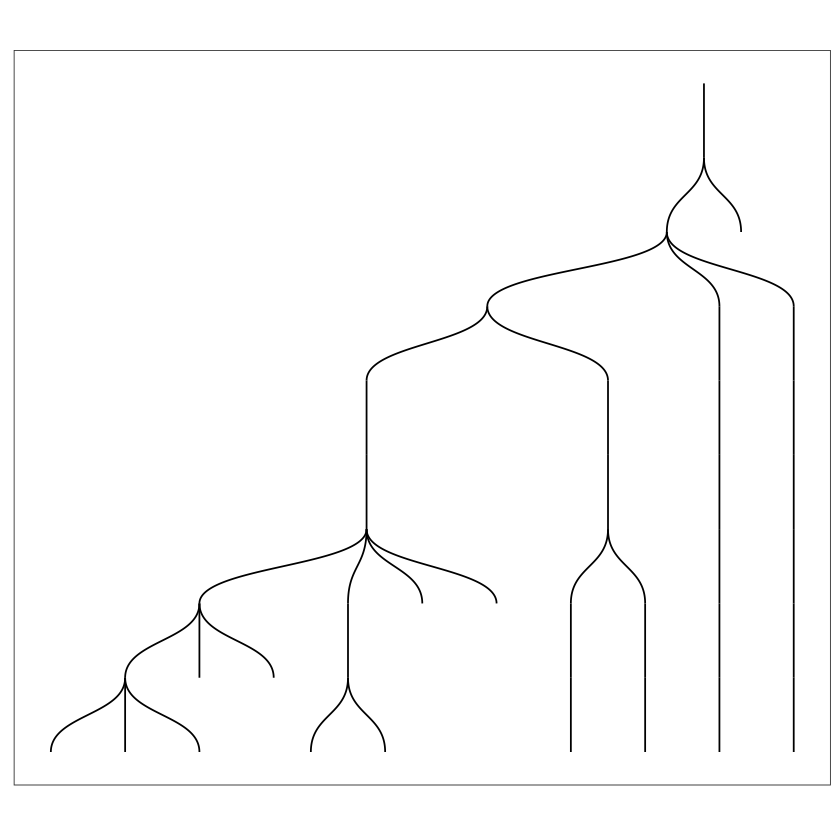

In [21]:
ggraph(g,'tree', circular = F) + 
  geom_edge_diagonal() +
  scale_edge_alpha('Direction', guide = 'edge_direction') +
  coord_equal() +
  theme_void() +
  ggforce::theme_no_axes()

In [22]:
color = c('G1'='#c6c6c6',
 'S'='#bc141a',
 'G2M'='#2070b4')

In [23]:
set.seed(1439)


cc <- cc[names(V(g)),]

g <- graph_from_data_frame( links )

V(g)$G1 <- cc$G1
V(g)$S <- cc$S
V(g)$G2M <- cc$G2M





#precompute the layout
xy = layout_as_tree(g)
V(g)$x <- xy[, 1]
V(g)$y <- xy[, 2]



g<- ggraph(g, "manual" , x = V(g)$x, y = V(g)$y) +
  geom_edge_diagonal() +
  geom_scatterpie(#aes(x=x, y=y, r=r),
    cols = c('G1', 'S', 'G2M'),
    data = as_data_frame(g, "vertices"),
    #colour = NA,
    pie_scale = 1.5
  ) +
  coord_fixed() +
  theme_graph(base_family="sans") +
  theme(legend.position = "left") + 
  scale_fill_manual(name = 'Phenograph_Clusters', values = color) +
  geom_node_text(label = names(V(g)), size=6)
ggsave('Figures2/Lineage_cc_pie.pdf', plot = g, width=30, height = 25)


## Gene expression

In [25]:
exp = read.table('group_expression.tsv', header = T, row.names = 1)


In [26]:
# Create a graph object 
g <- graph_from_data_frame( links )

In [27]:

gene = "gene13442.pfn1.L"
g <- graph_from_data_frame( links )

V(g)$gene <- as.numeric(exp[names(V(g)),gene])

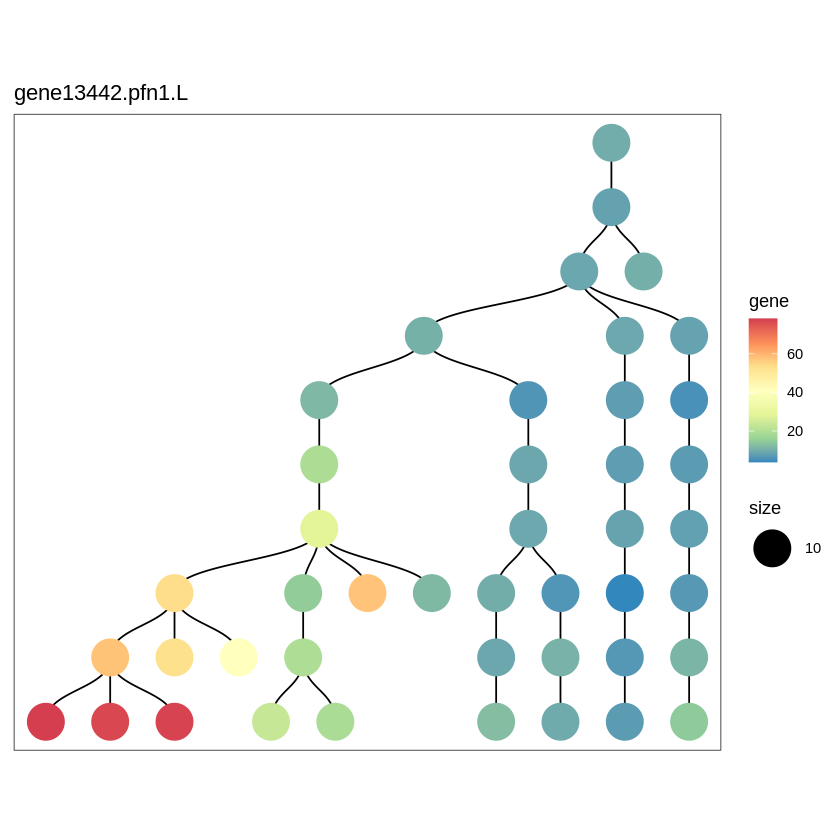

In [28]:
ggraph(g,'tree', circular = F) + 
  geom_edge_diagonal() +
  scale_edge_alpha('Direction', guide = 'edge_direction') +
  geom_node_point(aes( color = gene, size = 10)) + 
  scale_colour_distiller(palette = "Spectral") +
coord_equal() +
ggtitle(gene)+scale_size(range = c(10)) +
ggforce::theme_no_axes()

In [30]:
alpha_ion = c('gene11681.dmrt2.L')
beta_ion = c('gene36693.ca12.L', 'gene4408.slc26a4.S')

EP = c('gene1736.tp63.L')

ssc = c('gene37785.ano1.L', 'gene2352.foxa1.L', 'gene14901.kcna4.S', 'gene6609.camk1.L')
mcc = c('gene5617.tubb4b.L', 'gene5870.dynll1.L', 'gene45756.cav.3')


unknown = c('gene1670.pcdh8.2.L', 'gene4427.blvra.L', 'gene961.gpx3.S')

In [31]:
TF = c("gene11893.zfp36l2.S",
"gene12232.gata2.L",
"gene13000.foxa1.S",
"gene15645.cdx4.L",
"gene1736.tp63.L",
"gene19655.id2.S",
"gene3019.foxi1.L",
"gene3157.ctcf.S",
"gene37354.hic2.L",
"gene3847.klf4.L",
"gene49198.mcidas",
"gene9638.spdef.S",
"gene9656.nkx2.3.L")

In [32]:
markers = c("gene10103.hmgb3.L",
"gene38919.LOC108709680",

"gene10886.rplp1.L",
"gene4112.bmp7.2.L",

"gene11052.ncl.S",
"gene4142.cirbp.L",

"gene11681.dmrt2.L",
"gene42537.otog.L",

"gene1174.angpt4.S",
"gene43861.MGC52578",

"gene11920.ly6g6c.L",
"gene4408.slc26a4.S",

"gene12214.h1foo.S",
"gene4427.blvra.L",

"gene12224.hist1h2aa.L",
"gene44695.rpl35a.L",

"gene12364.has1.S",
"gene45261.LOC108698272",

"gene13019.tubb4b.S",
"gene45646.atp6v1b1.L",

"gene13271.sox3.S",
"gene45756.cav.3",

"gene13442.pfn1.L",
"gene45756.cav.3",

"gene13635.atp6v1g3.S",
"gene45777.LOC108696889",

"gene14439.hnrnpa0.S",
"gene46200.ccdc63.S",

"gene14901.kcna4.S",
"gene48102.LOC108714608",

"gene15013.cystm1.S",
"gene4819.ca2.L",

"gene15239.fucolectin.S",
"gene51016.tpm4.S",

"gene15250.eef1a1o.L",
"gene555.tmsb4x.L",

"gene15272.anp32c.S",
"gene5617.tubb4b.L",

"gene1566.hmgn1.L",
"gene5681.dynlrb2.L",

"gene15879.ctbs.S",
"gene5854.tekt2.S",

"gene16436.itln1.L",
"gene5870.dynll1.L",

"gene16696.cfap45.S",
"gene6178.sytl1.S",

"gene1670.pcdh8.2.L",
"gene6325.rps9",

"gene17236.anp32c.L",
"gene646.anxa2.S",

"gene17314.sox15.L",
"gene6609.camk1.L",

"gene1736.tp63.L",
"gene6831.meig1.S",

"gene17623.cycs.L",
"gene6846.rplp2.L",

"gene18434.cox7a2.S",
"gene721.atp12a.L",

"gene18794.tdgf1.3.L",
"gene7291.gmnn.S",

"gene19027.mycbp.L",
"gene7461.LOC108700425",

"gene19768.fbp1.L",
"gene79.foxi4.2.S",

"gene1.slc26a4.L",
"gene8127.nsep1",

"gene20453.atp6a1",
"gene8191.prmt1.S",

"gene21629.Xelaev18022166m",
"gene8397.ccnb1.2.L",

"gene2352.foxa1.L",
"gene8777.txn.L",
 
"gene2527.rbm7.L",
"gene888.zc3h10.S",

"gene2965.srsf7.S",
"gene8910.rplp0.L",

"gene3019.foxi1.L",
"gene8954.marcksl1.S",

"gene35324.hspa5",
"gene9078.ccna2.L",

"gene3584.krt5.7.L",
"gene9291.rps20.L",

"gene36159.capn9.S",
"gene933.dnali1.S",

"gene36693.ca12.L",
"gene94.pou5f3.2.L",

"gene37108.rpl36a.S",
"gene9585.rpl13.S",

"gene37785.ano1.L",
"gene961.gpx3.S",

"gene3817.s100a11.L",
"gene9991.krt5.7.S")

In [40]:
for(gene in markers){
    g <- graph_from_data_frame( links )
    
    V(g)$gene <- as.numeric(exp[names(V(g)),gene])
    
    ggraph(g,'tree', circular = F) + 
  geom_edge_diagonal() +
  scale_edge_alpha('Direction', guide = 'edge_direction') +
  geom_node_point(aes( color = gene, size = 10)) + 
  scale_colour_distiller(palette = "Spectral") +
coord_equal() +
ggtitle(gene)+scale_size(range = c(10)) +
ggforce::theme_no_axes()

    ggsave(paste('Figures2/Markers/', gene, 'expression_lineage.pdf'))
    
}

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 